# Iterative closest point
More details: https://en.wikipedia.org/wiki/Iterative_closest_point

In [1]:
# Install a pip package in the current Jupyter kernel
import sys
# !{sys.executable} -m pip install simpleicp

In [2]:
# Import all the necessary toolbox for basic python development 
from simpleicp import PointCloud, SimpleICP
import numpy as np
import numpy as np 
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import spatialmath
import scipy
import sys 
from sklearn.neighbors import NearestNeighbors
from spatialmath import *
from spatialmath.base import *
from scipy.spatial.transform import Rotation as R
from scipy.linalg import eigh

%matplotlib widget  


In [3]:
# Read point clouds from xyz files into n-by-3 numpy arrays
X_fix = np.genfromtxt("bunny_part1.xyz")

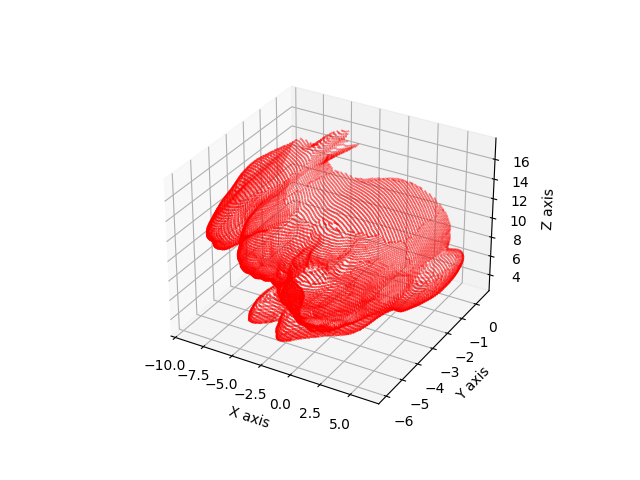

(20702, 3)


In [4]:
# Plot the cloud point X_fix
fig = plt.figure(1)      #create the figure
ax = fig.add_subplot(111, projection='3d')      #setup the 3D space

# Add the point to the figure
ax.scatter(X_fix[:, 0], X_fix[:, 1], X_fix[:, 2], c='r', marker='.', s=0.5)   
    

ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')

# Show the graph
plt.show(fig)

print(X_fix.shape)

In [5]:
# Build a transformation matrix with a translation of: 
# 2 along x, 
# 6 along y, 
# 0 along z
# and a rotation of:
# 15 degrees around z
# 20 degrees around x
T1 = np.dot(trotz(np.pi/12, t=(2,6,0)), trotx(np.pi/9))  #TODO
# Print the matrix T1
print(T1) #TODO

[[ 0.96592583 -0.24321035  0.08852133  2.        ]
 [ 0.25881905  0.90767337 -0.33036609  6.        ]
 [ 0.          0.34202014  0.93969262  0.        ]
 [ 0.          0.          0.          1.        ]]


In [6]:
# Create P_source which is equal to X_fix but transposed and with the homogenoues component 
P_source = np.zeros((4, 20702))
P_source[0,:] = X_fix[:,0]  #TODO
P_source[1,:] = X_fix[:,1]  #TODO
P_source[2,:] = X_fix[:,2]  #TODO
P_source[3,:] = 1 #TODO

# Multiply T1 and P_source to obtain P_end (end point cloud) 
P_end = np.dot(T1, P_source)  #TODO

# Exctract the array of points transposed back and without the homogenous component
PB = np.zeros((20702,3))
PB[:,0] = P_end[0,:]  #TODO
PB[:,1] = P_end[1,:]  #TODO
PB[:,2] = P_end[2,:]  #TODO

print(P_end.shape)
print(PB.shape)

# Save PB into the variable X_mov
X_mov = PB  #TODO
# Add some withe noise, impost the noise variable equal to 100 
mean_noise = 100 #TODO 
# In this way we add the random withe noise to our data
transf_points = PB + mean_noise * np.random.randn(*PB.shape)

# Traspose the array
transf_points_T = transf_points.T #np.transpose(transf_points)  #TODO

# Sort the rows
transf_points_sorted = transf_points_T[np.argsort(transf_points_T[:, 0])]

# Transpose back
transf_points = transf_points_sorted.T #np.transpose(transf_points_sorted) #TODO


(4, 20702)
(20702, 3)


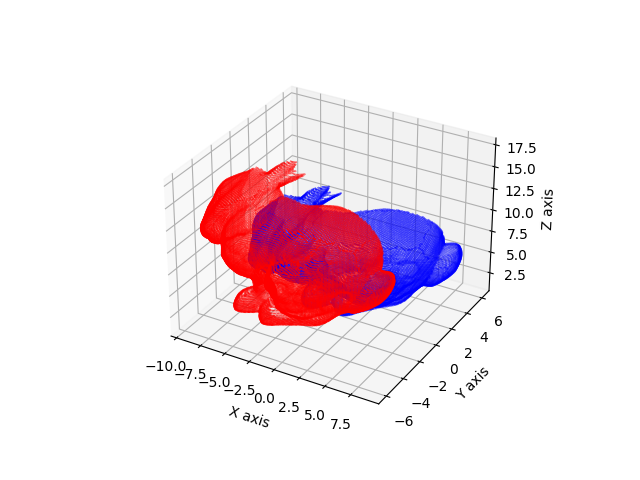

In [7]:
# Plot the two cloud points X_fix and X_mov
fig = plt.figure(2)      #create the figure
ax = fig.add_subplot(111, projection='3d')      #setup the 3D space

# Add the point to the figure
ax.scatter(X_fix[:, 0], X_fix[:, 1], X_fix[:, 2], c='r', marker='.', s=0.5)   
ax.scatter(X_mov[:, 0], X_mov[:, 1], X_mov[:, 2], c='b', marker='.', s=0.5) 

ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')

# Show the graph
plt.show(fig)

In [8]:
# Create point cloud objects
pc_fix = PointCloud(X_fix, columns=["x", "y", "z"])
pc_mov = PointCloud(X_mov, columns=["x", "y", "z"])

# Create simpleICP object, add point clouds, and run algorithm!
icp = SimpleICP()
icp.add_point_clouds(pc_fix, pc_mov)
H, X_mov_transformed, rigid_body_transformation_params, distance_residuals = icp.run(max_overlap_distance=50)

Consider partial overlap of point clouds ...
Select points for correspondences in fixed point cloud ...
Estimate normals of selected points ...
Start iterations ...
iteration | correspondences | mean(residuals) |  std(residuals)
   orig:0 |             875 |          0.1683 |          1.3465
        1 |             874 |          0.0922 |          0.9970
        2 |             836 |          0.0681 |          0.7128
        3 |             845 |          0.0378 |          0.6579
        4 |             856 |          0.0389 |          0.5843
        5 |             861 |          0.0084 |          0.5335
        6 |             877 |         -0.0050 |          0.4861
        7 |             879 |          0.0042 |          0.4146
        8 |             893 |         -0.0038 |          0.3715
        9 |             900 |         -0.0085 |          0.3107
       10 |             906 |         -0.0075 |          0.2712
       11 |             893 |         -0.0072 |          0.2270
   

In [9]:
# Print the two matrixes and compare the estimated one with the original one
print("Estimated T_matrix with ICP: \n", H)
print("Original T_matrix: \n", T1)

Estimated T_matrix with ICP: 
 [[ 9.65925826e-01  2.58819045e-01 -2.47279623e-14 -3.48476592e+00]
 [-2.43210347e-01  9.07673371e-01  3.42020143e-01 -4.95961953e+00]
 [ 8.85213269e-02 -3.30366090e-01  9.39692621e-01  1.80515388e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00]]
Original T_matrix: 
 [[ 0.96592583 -0.24321035  0.08852133  2.        ]
 [ 0.25881905  0.90767337 -0.33036609  6.        ]
 [ 0.          0.34202014  0.93969262  0.        ]
 [ 0.          0.          0.          1.        ]]


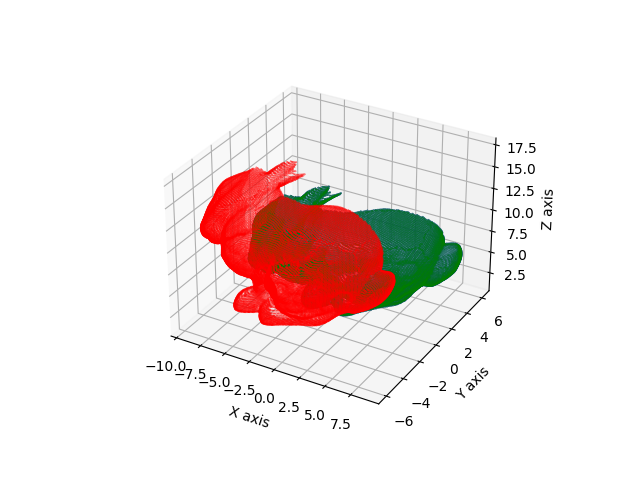

In [10]:
# Homework: #TODO
# Compute X_estimated multiplying the estimated transformation matrix H with the original cloud point X_fix
P_s = np.zeros((4, 20702))
P_s[0,:] = X_fix[:,0]
P_s[1,:] = X_fix[:,1]
P_s[2,:] = X_fix[:,2]
P_s[3,:] = 1

P_e = np.dot(np.linalg.inv(H), P_s)

X_estimated = np.zeros((20702,3))
X_estimated[:,0] = P_e[0,:]
X_estimated[:,1] = P_e[1,:]
X_estimated[:,2] = P_e[2,:]


# Plot the three cloud points (X_fix, X_mov, X_estimated) and check if the transformation was successfully estimated 
fig = plt.figure(3)      #create the figure
ax = fig.add_subplot(111, projection='3d')      #setup the 3D space

# Add the point to the figure
ax.scatter(X_fix[:, 0], X_fix[:, 1], X_fix[:, 2], c='r', marker='.', s=0.5)   
ax.scatter(X_mov[:, 0], X_mov[:, 1], X_mov[:, 2], c='b', marker='.', s=0.5)
ax.scatter(X_estimated[:, 0], X_estimated[:, 1], X_estimated[:, 2], c='g', marker='.', s=0.5) 

ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')

# Show the graph
plt.show(fig)

### More about this algorithm: https://github.com/pglira/simpleICP